In [5]:
import pandas as pd
import gzip
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os
print(tf.compat.v1.VERSION)
print(tf.keras.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.2.0
2.3.0-tf
Num GPUs Available:  1


In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [7]:
def showImage(data):
    some_article = data   # Selecting the image.
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [24]:
filePath_train_set = 'datasets/train-images-idx3-ubyte.gz'
filePath_train_label = 'datasets/train-labels-idx1-ubyte.gz'
filePath_test_set = 'datasets/t10k-images-idx3-ubyte.gz'
filePath_test_label = 'datasets/t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

In [25]:
print(trainSet.shape)
print(trainLabel.shape)
print(testSet.shape)
print(testLabel.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [26]:
X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


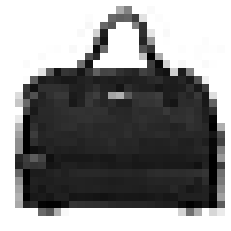

In [27]:
showImage(X_train[220])

In [28]:
y_train[220]

8

In [29]:
train_images = X_train.reshape((60000, 28, 28, 1))
test_images = X_test.reshape((10000, 28, 28, 1))

In [30]:
train_images.shape

(60000, 28, 28, 1)

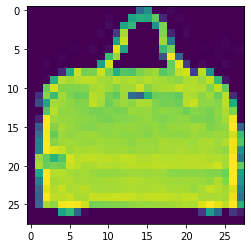

In [31]:
plt.figure()
plt.imshow(np.squeeze(train_images[220]))

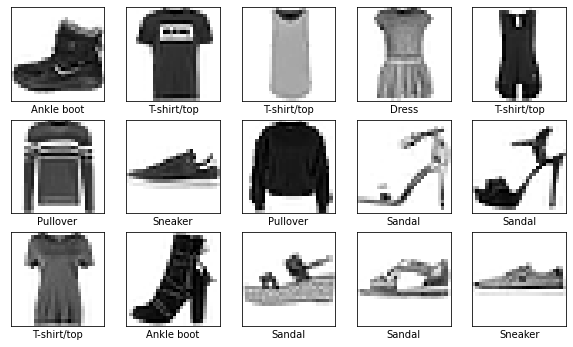

In [32]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.squeeze(train_images[i]), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [33]:
train_images_norm = train_images / 255.0

In [34]:
test_images_norm = test_images / 255.0

In [35]:
conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))

In [36]:
conv2 = layers.Conv2D(64, (3,3), activation='relu')

In [37]:
conv3 = layers.Conv2D(128, (3,3), activation='relu')

In [38]:
max_pool_1 = layers.MaxPooling2D((2,2))
max_pool_2 = layers.MaxPooling2D((2,2))
max_pool_3 = layers.MaxPooling2D((2,2))

In [39]:
flat_layer = layers.Flatten()

In [40]:
fc = layers.Dense(128, activation='relu')

In [41]:
output = layers.Dense(10, 'softmax')

In [42]:
model = models.Sequential()

model.add(conv1)
model.add(conv2)
model.add(conv3)
model.add(max_pool_1)
model.add(flat_layer)
model.add(fc)
model.add(output)

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1982592   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.fit(train_images_norm, y_train, epochs=20, batch_size=512, shuffle=True, validation_split=0.1)

Epoch 1/20
106/106 [==============================] - 20s 192ms/step - loss: 0.5943 - accuracy: 0.7880 - val_loss: 0.3838 - val_accuracy: 0.8628
Epoch 2/20
106/106 [==============================] - 7s 63ms/step - loss: 0.3258 - accuracy: 0.8840 - val_loss: 0.3062 - val_accuracy: 0.8893
Epoch 3/20
106/106 [==============================] - 7s 64ms/step - loss: 0.2616 - accuracy: 0.9060 - val_loss: 0.2767 - val_accuracy: 0.9022
Epoch 4/20
106/106 [==============================] - 7s 64ms/step - loss: 0.2296 - accuracy: 0.9165 - val_loss: 0.2609 - val_accuracy: 0.9045
Epoch 5/20
106/106 [==============================] - 7s 64ms/step - loss: 0.2039 - accuracy: 0.9246 - val_loss: 0.2383 - val_accuracy: 0.9140
Epoch 6/20
106/106 [==============================] - 7s 65ms/step - loss: 0.1718 - accuracy: 0.9372 - val_loss: 0.2181 - val_accuracy: 0.9225
Epoch 7/20
106/106 [==============================] - 7s 64ms/step - loss: 0.1479 - accuracy: 0.9469 - val_loss: 0.2198 - val_accuracy: 0.92

In [46]:
test_loss, test_accuracy = model.evaluate(test_images_norm, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.4488 - accuracy: 0.9246


In [47]:
print('Accuracy = ',test_accuracy)

Accuracy =  0.9246000051498413


In [48]:
drop_1 = keras.layers.Dropout(0.5)
drop_2 = keras.layers.Dropout(0.5)
drop_3 = keras.layers.Dropout(0.5)

In [49]:
new_model = models.Sequential()

new_model.add(conv1)
new_model.add(conv2)
new_model.add(max_pool_2)
new_model.add(drop_2)
new_model.add(conv3)
new_model.add(max_pool_3)
new_model.add(drop_3)
new_model.add(layers.Flatten())
new_model.add(layers.Dense(128, activation='relu'))
new_model.add(output)

In [50]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 128)        

In [51]:
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
new_model.fit(train_images_norm, y_train, epochs=30, batch_size=512, shuffle=True, validation_split=0.1)

Epoch 1/30
106/106 [==============================] - 10s 92ms/step - loss: 0.4988 - accuracy: 0.8229 - val_loss: 0.3024 - val_accuracy: 0.8938
Epoch 2/30
106/106 [==============================] - 4s 35ms/step - loss: 0.3272 - accuracy: 0.8813 - val_loss: 0.2593 - val_accuracy: 0.9043
Epoch 3/30
106/106 [==============================] - 4s 35ms/step - loss: 0.2912 - accuracy: 0.8933 - val_loss: 0.2624 - val_accuracy: 0.9072
Epoch 4/30
106/106 [==============================] - 4s 35ms/step - loss: 0.2705 - accuracy: 0.8991 - val_loss: 0.2442 - val_accuracy: 0.9112
Epoch 5/30
106/106 [==============================] - 4s 37ms/step - loss: 0.2546 - accuracy: 0.9059 - val_loss: 0.2268 - val_accuracy: 0.9182
Epoch 6/30
106/106 [==============================] - 4s 37ms/step - loss: 0.2437 - accuracy: 0.9099 - val_loss: 0.2296 - val_accuracy: 0.9148
Epoch 7/30
106/106 [==============================] - 4s 37ms/step - loss: 0.2289 - accuracy: 0.9160 - val_loss: 0.2213 - val_accuracy: 0.919

In [53]:
test_loss, test_accuracy = new_model.evaluate(test_images_norm, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1901 - accuracy: 0.9344


In [54]:
print('Accuracy = ',test_accuracy)

Accuracy =  0.9344000220298767
